In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.metrics import r2_score 

In [2]:
flights_df=pd.read_csv(r"C:\Users\BAPS\Desktop\Python\Datasets\flights.csv")

In [3]:
flights_df.head()

Month  DayOfMonth  DayOfWeek  PlaneAge  Distance  AirTime  DepTime  \
0    1.0         3.0        4.0      10.0     810.0    116.0   2003.0   
1    1.0         3.0        4.0      10.0    2283.0    314.0    734.0   
2    1.0         3.0        4.0      10.0    1521.0    175.0   1052.0   
3    1.0         3.0        4.0      10.0     577.0     79.0   1653.0   
4    1.0         4.0        5.0      10.0     239.0     48.0   1338.0   

   ArrTime  ArrDelay  
0   2211.0     -14.0  
1    958.0     -22.0  
2   1603.0     -17.0  
3   1932.0       2.0  
4   1440.0      10.0

In [4]:
flights_df.info()
# OBSERVATIONS -> All columns are float64 datatypes 
# There are 5929413 records and 9 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929413 entries, 0 to 5929412
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Month       float64
 1   DayOfMonth  float64
 2   DayOfWeek   float64
 3   PlaneAge    float64
 4   Distance    float64
 5   AirTime     float64
 6   DepTime     float64
 7   ArrTime     float64
 8   ArrDelay    float64
dtypes: float64(9)
memory usage: 407.1 MB


In [5]:
total_missing = flights_df.isnull().sum()
percentage_missing = total_missing * 100 / len(flights_df)
missing_value_df = pd.DataFrame(data=[total_missing, percentage_missing], index=["Total", "%"]).T
missing_value_df

# Observation -> there are no null values present in the dataset

Total    %
Month         0.0  0.0
DayOfMonth    0.0  0.0
DayOfWeek     0.0  0.0
PlaneAge      0.0  0.0
Distance      0.0  0.0
AirTime       0.0  0.0
DepTime       0.0  0.0
ArrTime       0.0  0.0
ArrDelay      0.0  0.0

In [6]:
flights_df_o=flights_df

In [7]:
flights_df.describe().T
# Columns ["Distance","AirTime","ArrTime""ArrDelay"] could have outliers, as difference between their mean and meadian is more than 10%

count         mean         std    min     25%     50%     75%  \
Month       5929413.0     6.287051    3.369899    1.0     3.0     6.0     9.0   
DayOfMonth  5929413.0    15.732272    8.799917    1.0     8.0    16.0    23.0   
DayOfWeek   5929413.0     3.924268    1.987944    1.0     2.0     4.0     6.0   
PlaneAge    5929413.0    10.536283    7.323344    0.0     5.0     8.0    15.0   
Distance    5929413.0   729.909151  562.492211   11.0   329.0   584.0   950.0   
AirTime     5929413.0   104.178259   67.448575    0.0    56.0    86.0   132.0   
DepTime     5929413.0  1334.082235  479.143784    1.0   927.0  1325.0  1729.0   
ArrTime     5929413.0  1480.515061  506.343663    1.0  1105.0  1511.0  1909.0   
ArrDelay    5929413.0     8.131152   38.162887 -519.0   -10.0    -2.0    12.0   

               max  
Month         12.0  
DayOfMonth    31.0  
DayOfWeek      7.0  
PlaneAge      52.0  
Distance    4962.0  
AirTime     1350.0  
DepTime     2400.0  
ArrTime     2400.0  
ArrDelay    2461.0

In [8]:
sampled_flight_df=flights_df.sample(200000)

# Univariante Analysis

C:\Users\BAPS\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


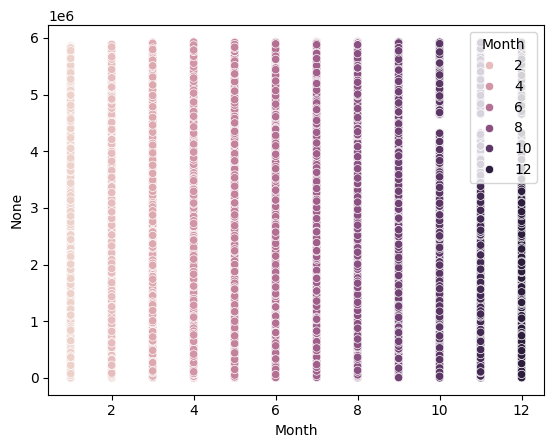

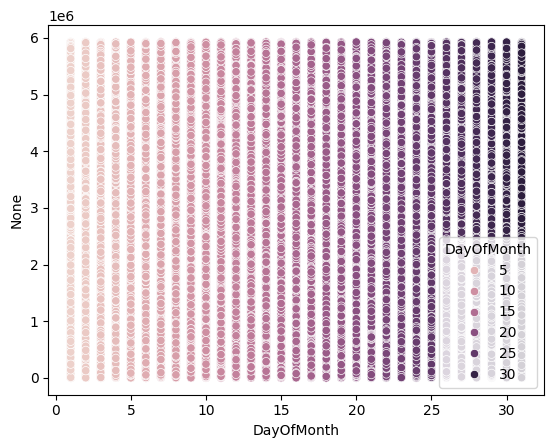

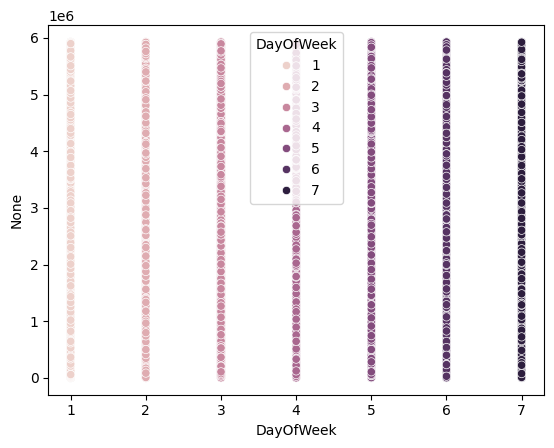

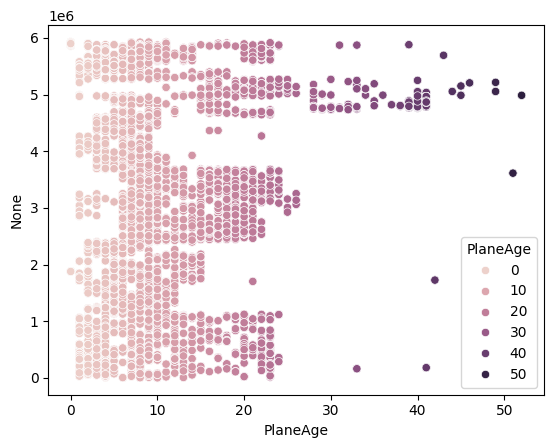

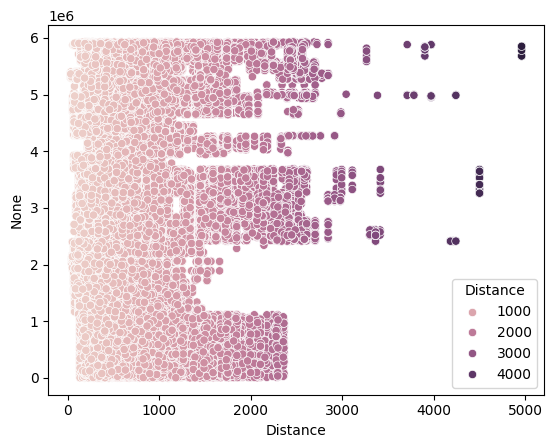

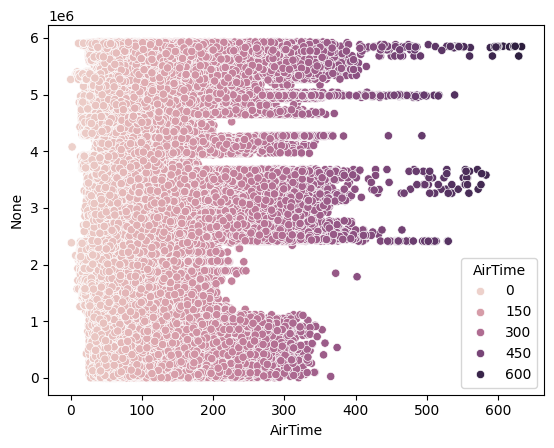

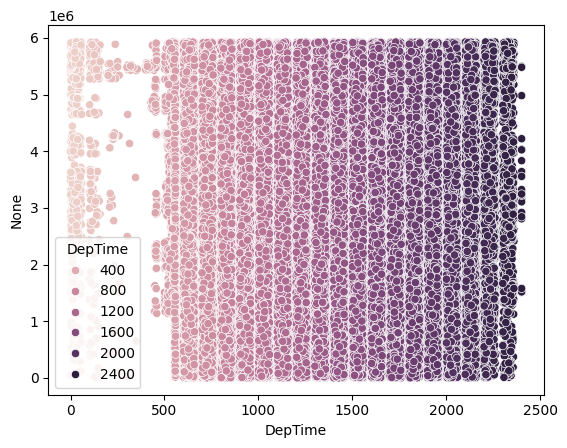

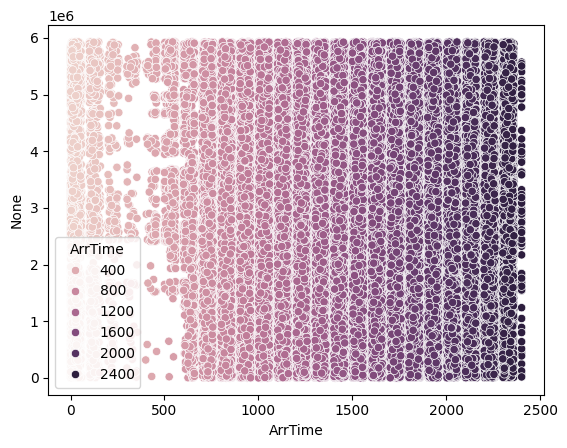

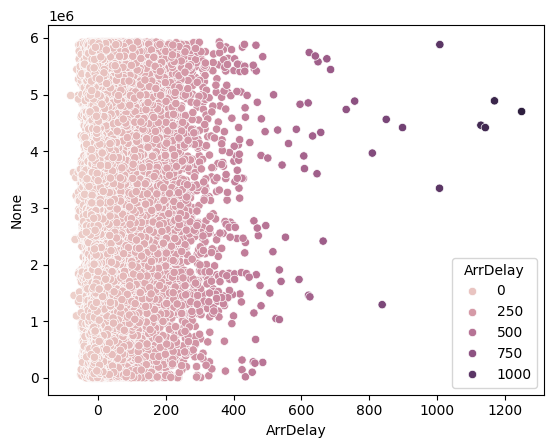

In [9]:
for col in sampled_flight_df.columns:
    plt.figure()
    sns.scatterplot(x=sampled_flight_df[col],data=sampled_flight_df,y=sampled_flight_df.index,hue=col)

<Figure size 640x480 with 0 Axes>

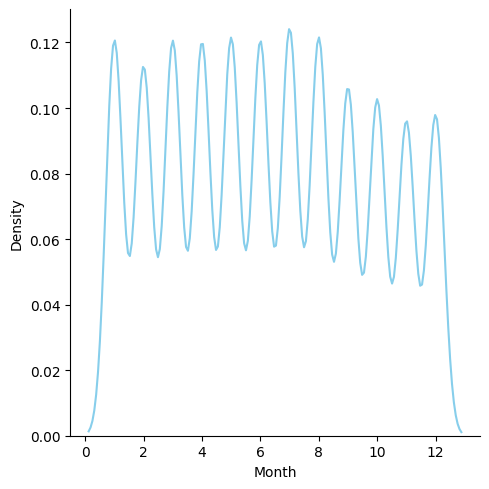

<Figure size 640x480 with 0 Axes>

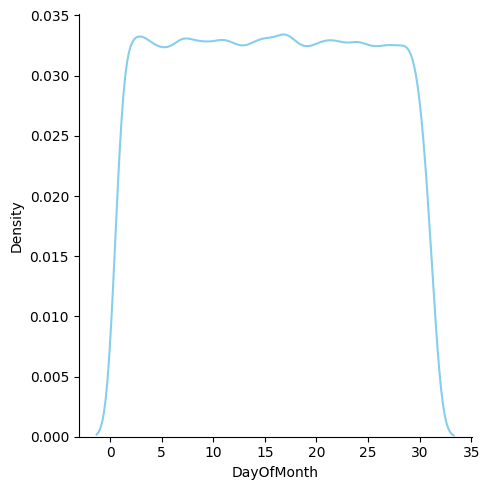

<Figure size 640x480 with 0 Axes>

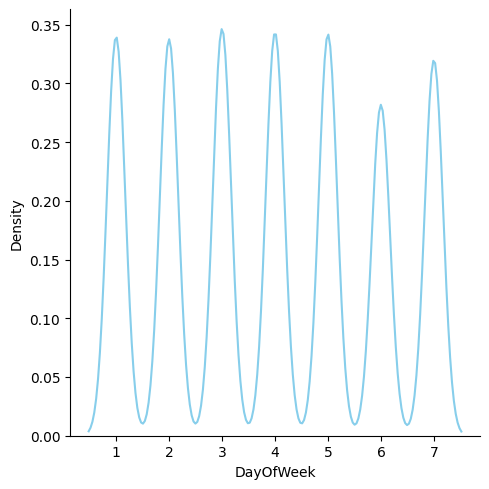

<Figure size 640x480 with 0 Axes>

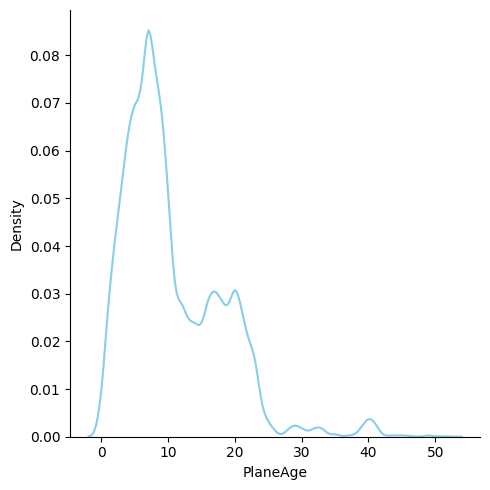

<Figure size 640x480 with 0 Axes>

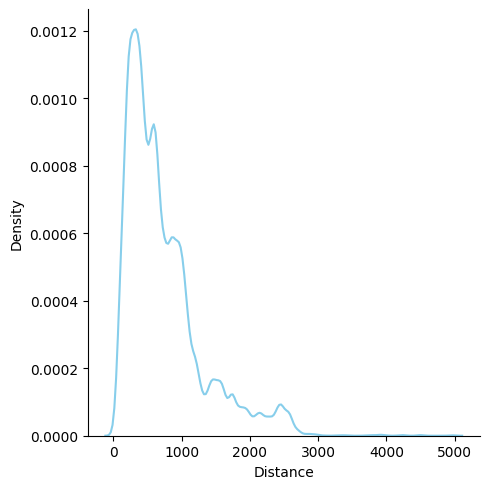

<Figure size 640x480 with 0 Axes>

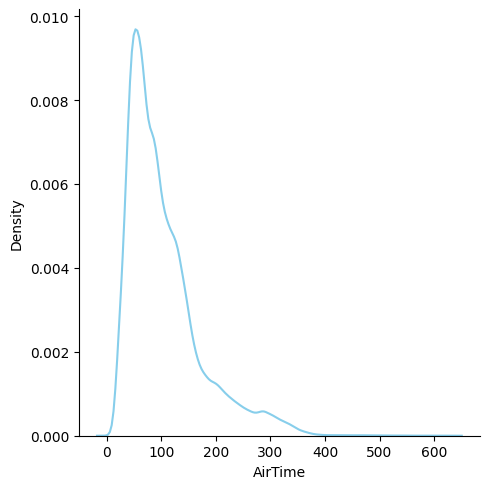

<Figure size 640x480 with 0 Axes>

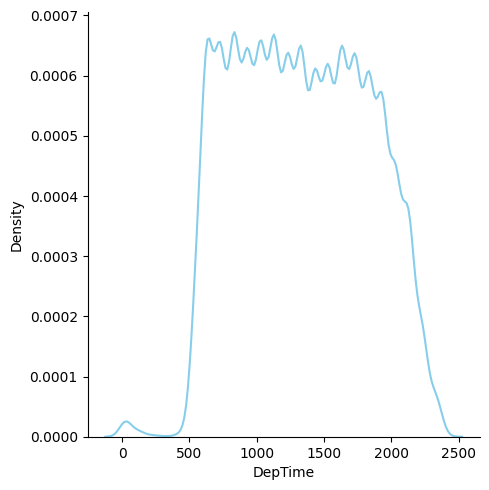

<Figure size 640x480 with 0 Axes>

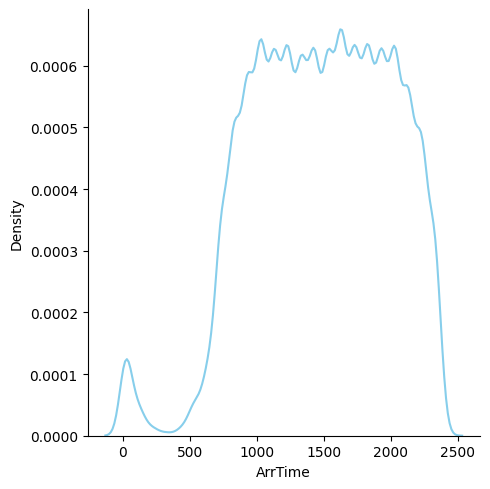

<Figure size 640x480 with 0 Axes>

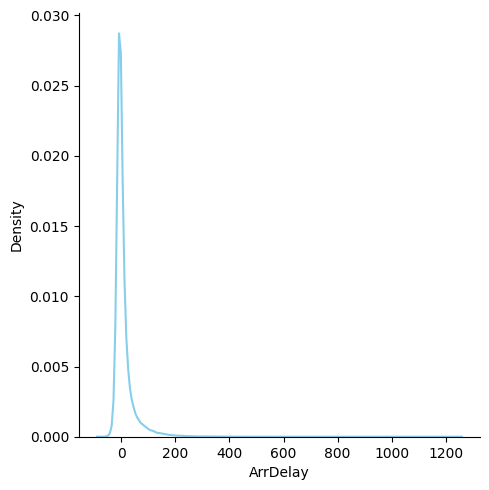

In [10]:
for col in sampled_flight_df.columns:
    plt.figure()
    sns.displot(x=sampled_flight_df[col],color='skyblue',kind='kde')

# Bivariante Analysis

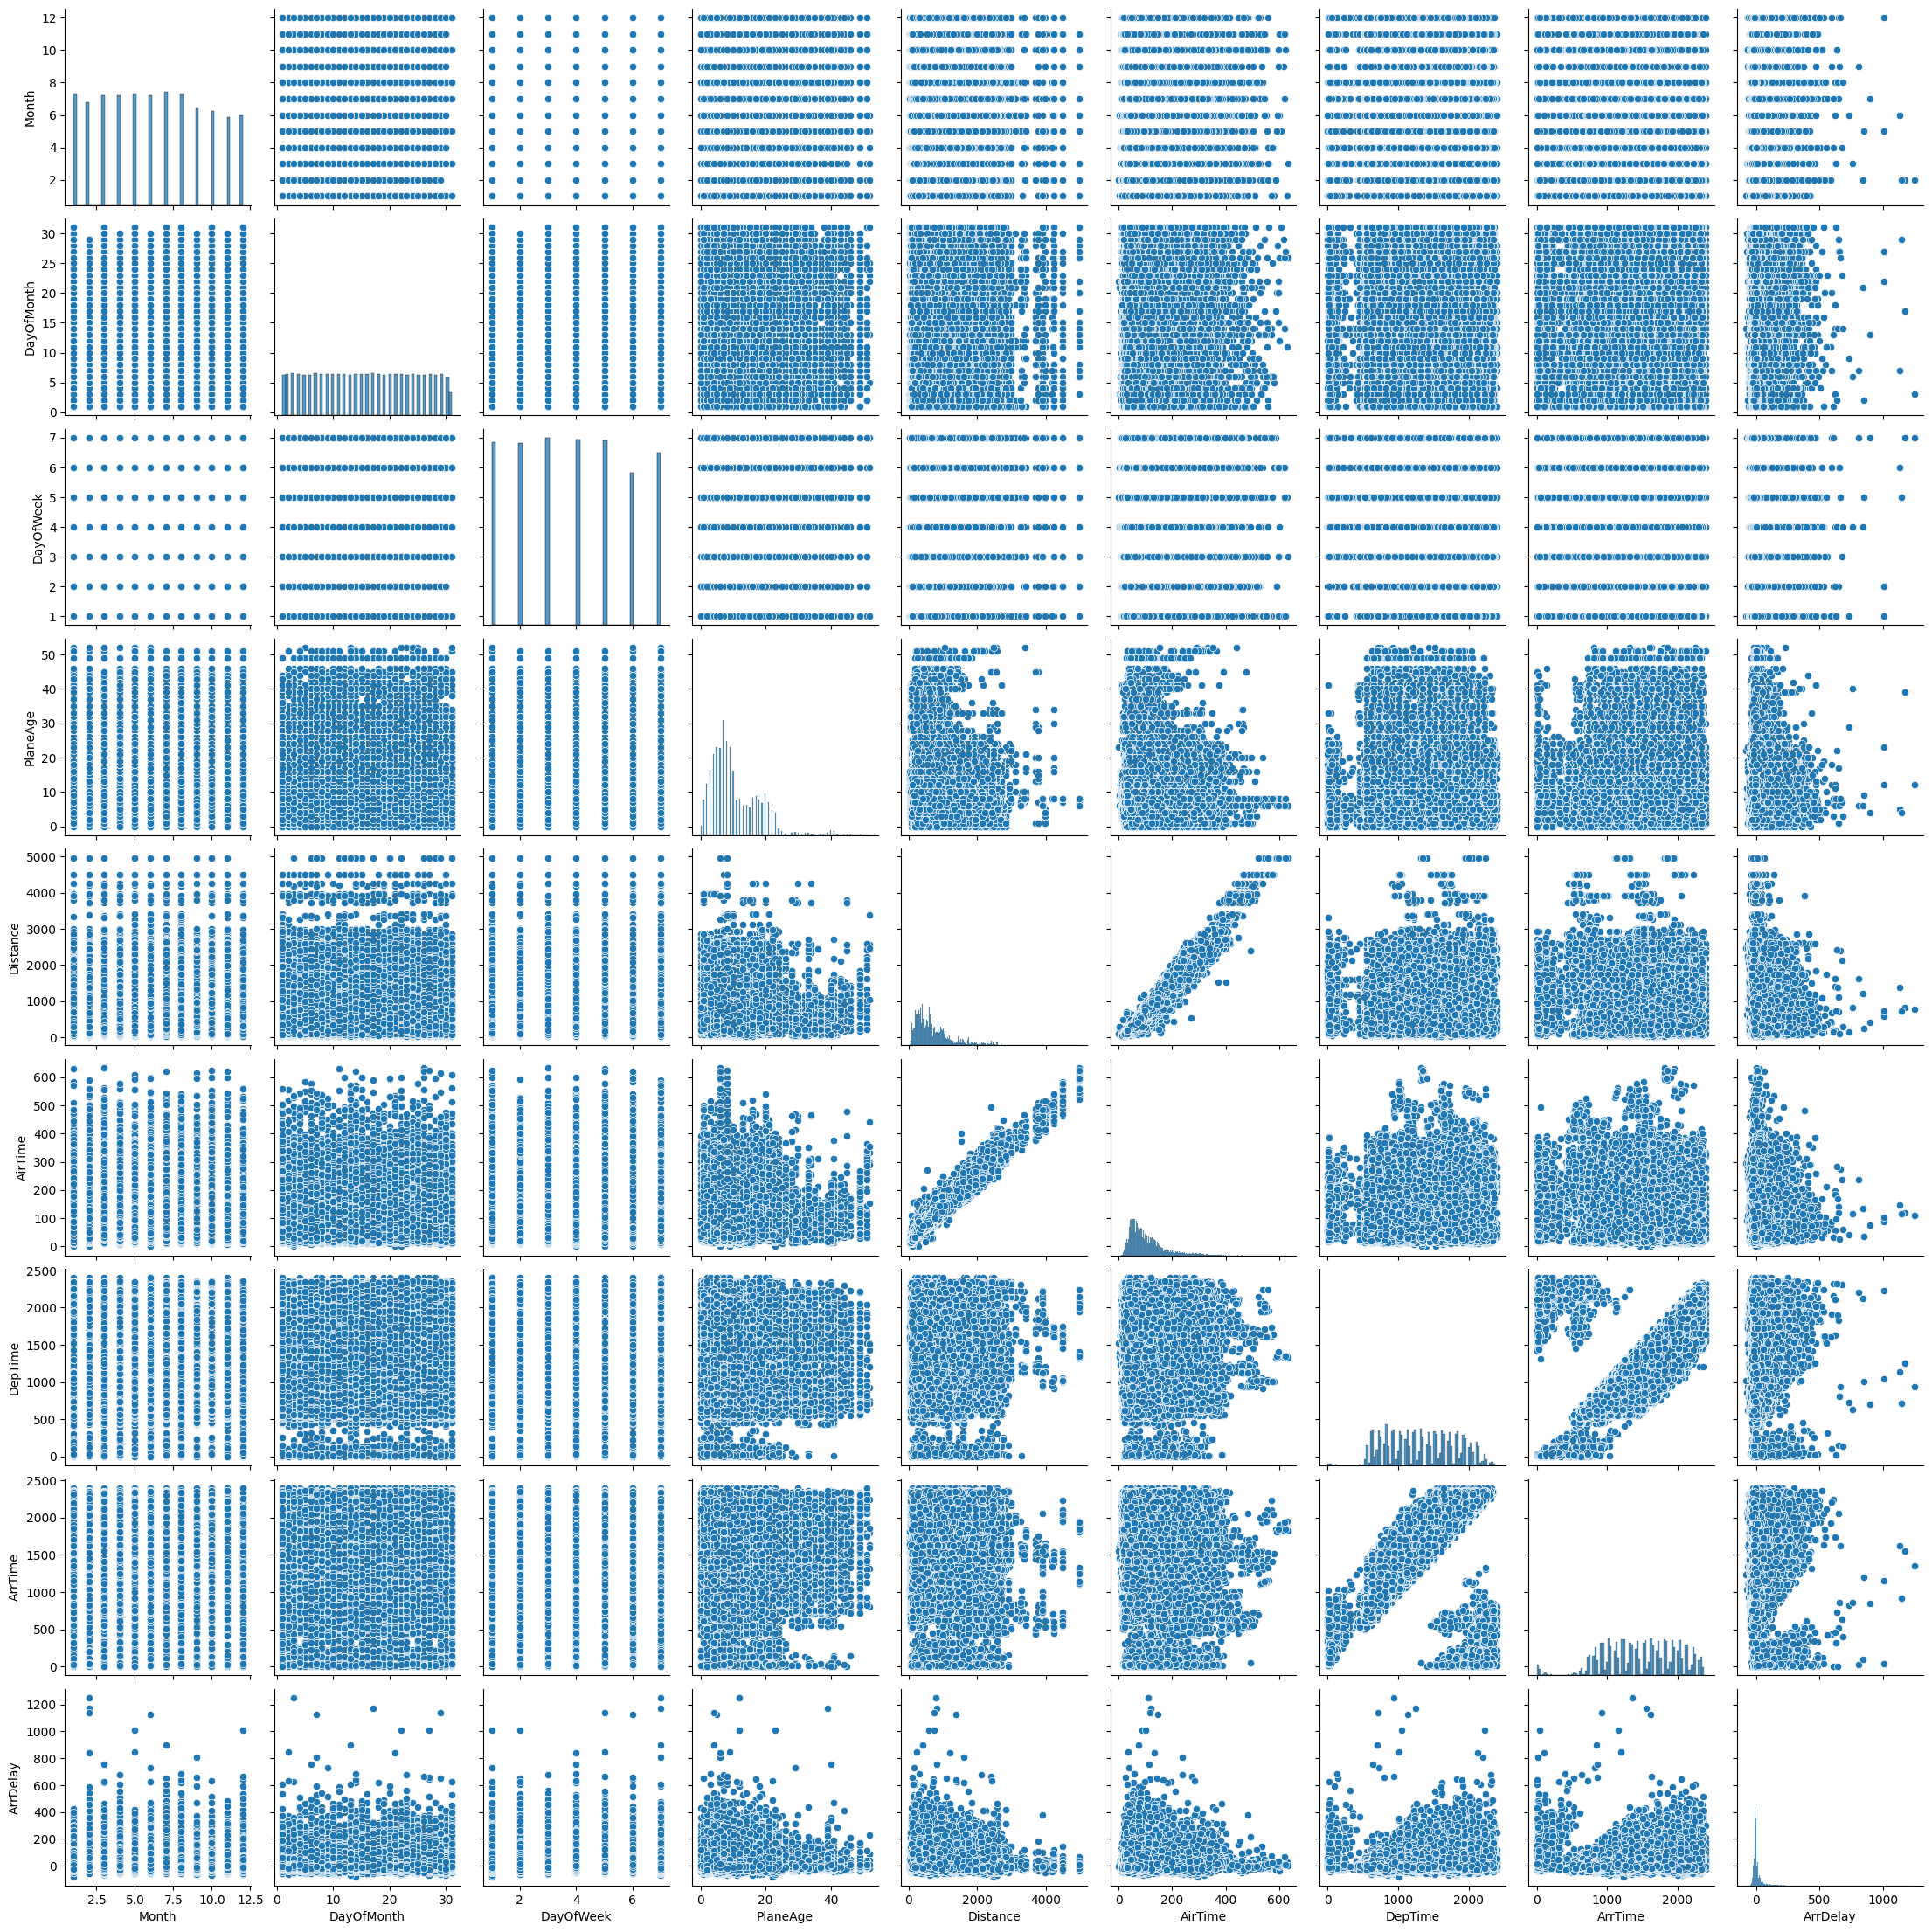

In [11]:
sns.pairplot(data=sampled_flight_df)

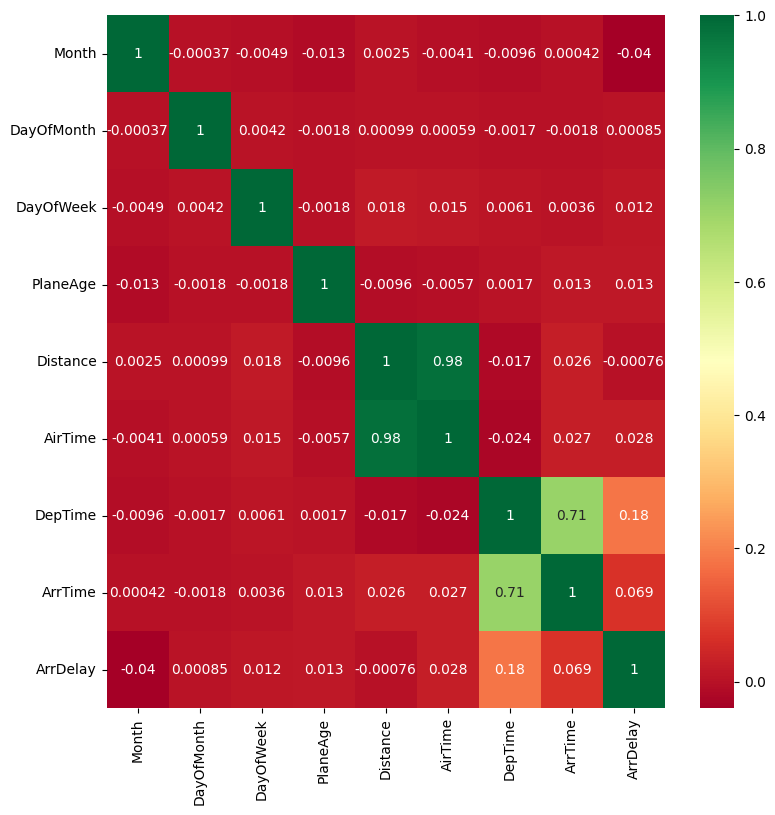

In [12]:
corr=flights_df.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

In [13]:
# for column in sampled_flight_df1.columns :
#     plt.figure()
#     sns.boxplot(x = sampled_flight_df1[column], data = sampled_flight_df1)

In [14]:
print('Before outlier removal : ',flights_df.shape)
z = np.abs(zscore(flights_df, axis = 1))
z1=(pd.DataFrame(z,columns=flights_df.columns))
threshold = 2
dataset = flights_df[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

Before outlier removal :  (5929413, 9)
After Z-Score approach :  (5122922, 9)


In [15]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(dataset)
robust_df = pd.DataFrame(robust_df, columns =dataset.columns)

In [16]:
# sampled_flight_df1=robust_df.drop(["Distance","DayOfMonth"],axis=1)

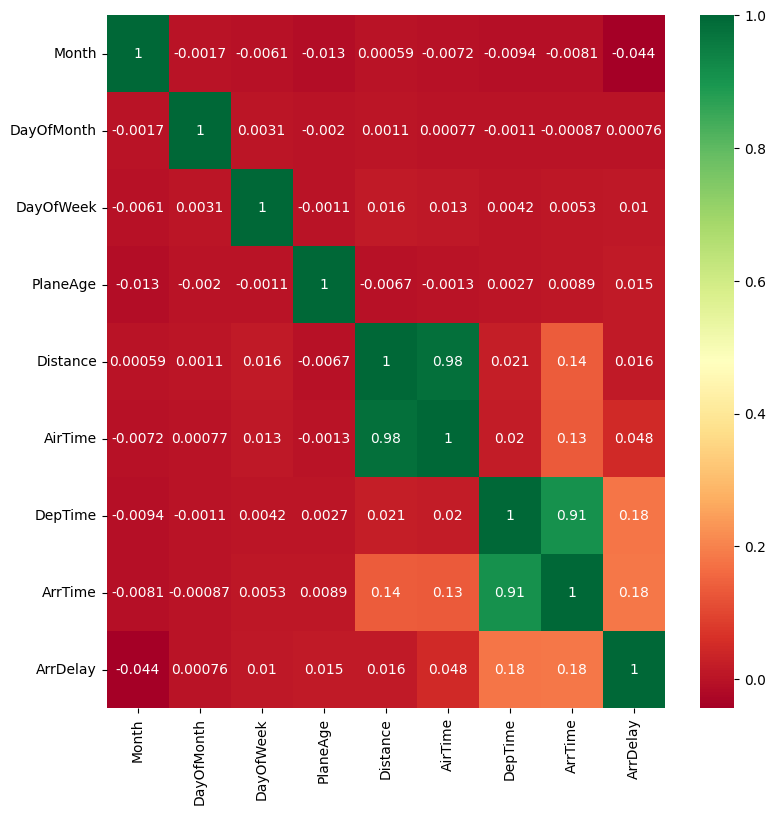

In [17]:
corr=robust_df.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

In [18]:
skew=robust_df.skew()
skew

Month         0.069262
DayOfMonth    0.005694
DayOfWeek     0.060654
PlaneAge      1.312447
Distance      1.436729
AirTime       1.365890
DepTime      -0.005906
ArrTime      -0.138176
ArrDelay      5.437359
dtype: float64

In [19]:
kurt=robust_df.kurt()
kurt

Month         -1.145905
DayOfMonth    -1.193980
DayOfWeek     -1.217931
PlaneAge       2.472038
Distance       2.342133
AirTime        2.244539
DepTime       -1.077141
ArrTime       -0.976625
ArrDelay      72.601140
dtype: float64

In [20]:
from sklearn.preprocessing import QuantileTransformer

In [21]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
robust_df["ArrDelay"]= quantile_transformer.fit_transform(robust_df["ArrDelay"].values.reshape(-1, 1)).flatten()

In [22]:
robust_df.skew()

Month         0.069262
DayOfMonth    0.005694
DayOfWeek     0.060654
PlaneAge      1.312447
Distance      1.436729
AirTime       1.365890
DepTime      -0.005906
ArrTime      -0.138176
ArrDelay      0.040279
dtype: float64

In [23]:
robust_df.kurt()

Month        -1.145905
DayOfMonth   -1.193980
DayOfWeek    -1.217931
PlaneAge      2.472038
Distance      2.342133
AirTime       2.244539
DepTime      -1.077141
ArrTime      -0.976625
ArrDelay     -0.040134
dtype: float64

In [24]:
x=robust_df.drop(['ArrDelay'],axis=1)
y=robust_df["ArrDelay"]

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4098337, 8)
(1024585, 8)
(4098337,)
(1024585,)


In [27]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()

lr_model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_predict_lr_train=lr_model.predict(x_train)
y_predict_lr_test=lr_model.predict(x_test)

In [29]:
print(r2_score(y_train,y_predict_lr_train))
print("\n")
print(r2_score(y_test,y_predict_lr_test))

0.09685564335010799


0.0962929293439806


# Random Forest

In [30]:
# from sklearn.ensemble import RandomForestRegressor
# rf_model = RandomForestRegressor()
# rf_model.fit(x_train, y_train)
# y_predict_rf_train = rf_model.predict(x_train)
# y_predict_rf_test = rf_model.predict(x_test)
# print(r2_score(y_train, y_predict_rf_train))
# print("\n")
# print(r2_score(y_test, y_predict_rf_test))

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_predict_dt_train=dt_model.predict(x_train)
y_predict_dt_test=dt_model.predict(x_test)
print(r2_score(y_train, y_predict_dt_train))

print("\n")
print(r2_score(y_test, y_predict_dt_test))  

0.9999984527809997


-0.17639299138458853


## GridSearchCV 
- Linear Regression

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
alpha_space=np.logspace(-5,8,200)
para_grid={'alpha':alpha_space}

reg_cv=GridSearchCV(ridge,para_grid,cv=5)
reg_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.16232247e-05, 1.35099352e-05, 1.57029012e-05,
       1.82518349e-05, 2.12145178e-05, 2.46581108e-05, 2.86606762e-05,
       3.33129479e-05, 3.87203878e-05, 4.50055768e-05, 5.23109931e-05,
       6.08022426e-05, 7.06718127e-05, 8.21434358e-05, 9.54771611e-05,
       1.10975250e-04, 1.28989026e-04, 1.49926843e-04, 1....
       3.14403547e+06, 3.65438307e+06, 4.24757155e+06, 4.93704785e+06,
       5.73844165e+06, 6.66991966e+06, 7.75259749e+06, 9.01101825e+06,
       1.04737090e+07, 1.21738273e+07, 1.41499130e+07, 1.64467618e+07,
       1.91164408e+07, 2.22194686e+07, 2.58261876e+07, 3.00183581e+07,
       3.48910121e+07, 4.05546074e+07, 4.71375313e+07, 5.47890118e+07,
       6.36824994e+07, 7.40196000e+07, 8.60346442e+07, 1.00000000e+08])})

In [33]:
# for Ridge regression
y_predict_train_cv = reg_cv.predict(x_train)
y_predict_test_cv = reg_cv.predict(x_test)
print(r2_score(y_train, y_predict_train_cv))
print("\n")
print(r2_score(y_test, y_predict_test_cv))

0.09685564333658248


0.09629292786619714


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Define model
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameter distributions
param_dist = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=30,           # Try 30 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(x_train, y_train)

# Best model
best_dt_random = random_search.best_estimator_

# Predict
y_predict_train = best_dt_random.predict(x_train)
y_predict_test = best_dt_random.predict(x_test)

# Scores
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))
print("Best Parameters:", random_search.best_params_)

Train R2: 0.3180000227594213
Test R2 : 0.19939487028669067
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': 20, 'criterion': 'friedman_mse'}


In [ ]:
aa

# Using IQR method

In [35]:
Q1 = flights_df.quantile(0.25)  # Q1
Q3 = flights_df.quantile(0.75)  # Q3
IQR = Q3-Q1
dataset = flights_df[~((flights_df<(Q1-1.5*IQR)) | (flights_df>(Q3+1.5*IQR)))]

In [36]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(dataset)
robust_df = pd.DataFrame(robust_df, columns =dataset.columns)

In [37]:
sampled_flight_df1=robust_df.drop(["Distance","DayOfMonth"],axis=1)

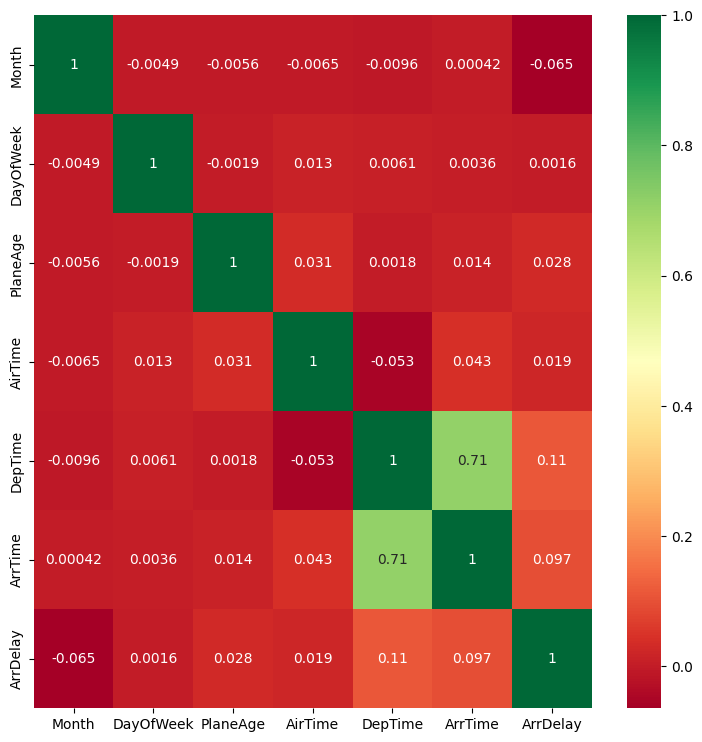

In [38]:
corr=sampled_flight_df1.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

In [39]:
# corr=sampled_flight_df1.corr()
# plt.subplots(figsize=(7,7))
# sns.heatmap(corr,cmap='RdYlGn',annot=True)
# plt.show()

In [40]:
sampled_flight_df1.head()

Month  DayOfWeek  PlaneAge   AirTime   DepTime   ArrTime  ArrDelay
0 -0.833333       0.00       0.2  0.500000  0.845387  0.870647 -0.647059
1 -0.833333       0.00       0.2       NaN -0.736908 -0.687811 -1.117647
2 -0.833333       0.00       0.2  1.367647 -0.340399  0.114428 -0.823529
3 -0.833333       0.00       0.2 -0.044118  0.408978  0.523632  0.294118
4 -0.833333       0.25       0.2 -0.500000  0.016209 -0.088308  0.764706

In [41]:
skew=sampled_flight_df1.skew()
skew

Month        0.073584
DayOfWeek    0.059722
PlaneAge     0.686722
AirTime      0.898472
DepTime      0.056198
ArrTime     -0.315326
ArrDelay     0.728350
dtype: float64

In [42]:
kurt=sampled_flight_df1.kurt()
kurt

Month       -1.141561
DayOfWeek   -1.214835
PlaneAge    -0.430784
AirTime      0.253278
DepTime     -0.989255
ArrTime     -0.377524
ArrDelay     0.580275
dtype: float64

In [43]:
sampled_flight_df1.dropna(inplace=True)

# Linear Regression

In [44]:
x=sampled_flight_df1.drop(['ArrDelay'],axis=1)
y=sampled_flight_df1["ArrDelay"]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_predict_lr_train=lr_model.predict(x_train)
y_predict_lr_test=lr_model.predict(x_test)
print(r2_score(y_train,y_predict_lr_train))
print("\n")
print(r2_score(y_test,y_predict_lr_test))

(4014464, 6)
(1003616, 6)
(4014464,)
(1003616,)
0.018748806145065466


0.01921554924239699


# Random Forest

In [45]:
# from sklearn.ensemble import RandomForestRegressor
# rf_model = RandomForestRegressor()
# rf_model.fit(x_train, y_train)
# y_predict_rf_train = rf_model.predict(x_train)
# y_predict_rf_test = rf_model.predict(x_test)
# print(r2_score(y_train, y_predict_rf_train))
# print("\n")
# print(r2_score(y_test, y_predict_rf_test))

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_predict_dt_train=dt_model.predict(x_train)
y_predict_dt_test=dt_model.predict(x_test)
print(r2_score(y_train, y_predict_dt_train))
print("\n")
print(r2_score(y_test, y_predict_dt_test))

In [ ]:
x=pd.DataFrame(y_predict_dt_train,columns=["Predicted Values"])
x

Predicted Values
0                0.470588
1                2.000000
2                0.411765
3                1.529412
4                0.823529
...                   ...
4014459         -0.352941
4014460         -0.235294
4014461          0.647059
4014462          0.823529
4014463          0.823529

[4014464 rows x 1 columns]